# Algoritmos Geneticos

## Optimización caso mochila

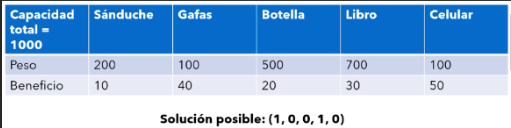

In [11]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

In [12]:
weights = np.array ([200,100,500,700,100])
price = np.array([10,60,30,80,50])
maxWeight = 1000

In [13]:
def evaluateUtility(individual):
    util = 0.0
    util = np.dot(individual, price) #beneficio
    total= np.dot(individual, weights) #peso
    if total > maxWeight:
        util = 1.0
    return util, #El retorno tiene que ser una tupla

In [14]:
#Crear el contenedor con toda la información
toolbox = base.Toolbox()
creator.create('FitnessMax', base.Fitness, weights=(1.0,)) #Uno para maximizar, menos uno para minimizar
creator.create('Individual', list, fitness=creator.FitnessMax)

# Configuro como se va a realizar la población, el individuo y la función de evaluación
toolbox.register('attribute', random.randint, 0,1) #Crea individos de 0 o 1
toolbox.register('individual', tools.initRepeat, creator.Individual, toolbox.attribute, n=len(weights)) #n es el número de genes, este caso 5
toolbox.register('population', tools.initRepeat, list, toolbox.individual) #Crea la población
toolbox.register('select', tools.selTournament, tournsize=3) #Selecciona el torneo de 3
toolbox.register('mate', tools.cxOnePoint) #Cruza un individuos
toolbox.register('mutate', tools.mutFlipBit, indpb=0.05) #Mutación de un bit o cromosoma con probabilidad 0.05
toolbox.register('evaluate', evaluateUtility) #Evalua la función de utilidad

statis= tools.Statistics(lambda ind: ind.fitness.values) #Estadísticas de la población
statis.register('max', np.max) #Máximo de la población
statis.register('min', np.min) #Mínimo de la población
statis.register('avg', np.mean) #Promedio de la población
statis.register('std', np.std) #Desviación estándar de la población

c:\Users\josal\AppData\Local\Programs\Python\Python311\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [15]:
population = toolbox.population(n=100) #Población de 100 individuos
population, logbook = algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.5, ngen=50, stats=statis, verbose=True) #Evolución de la población
print('El resultado de la evolución es:')
print(logbook)
print('El mejor individuo es:')
print(tools.selBest(population, k=1)[0]) #Mejor individuo de la población

gen	nevals	max	min	avg  	std    
0  	100   	190	0  	67.68	60.8416
1  	76    	190	0  	107.03	56.0153
2  	77    	190	1  	123.91	51.3656
3  	70    	190	1  	135.78	46.8495
4  	65    	190	1  	149.96	46.7232
5  	75    	190	1  	149.1 	57.3349
6  	85    	190	1  	161.41	59.514 
7  	70    	190	1  	178.65	42.2164
8  	74    	190	1  	182.32	29.6722
9  	73    	190	1  	181.93	34.0074
10 	75    	190	1  	178.53	37.7103
11 	72    	190	1  	177.73	37.109 
12 	75    	190	1  	179.73	35.7793
13 	75    	190	1  	178.93	35.9595
14 	74    	190	1  	170.58	52.0917
15 	68    	190	130	187.8 	10.824 
16 	72    	190	1  	173.77	49.2246
17 	72    	190	1  	173.66	47.794 
18 	77    	190	1  	177.24	40.1998
19 	75    	190	1  	179.93	36.2798
20 	74    	190	1  	178.73	36.1748
21 	78    	190	1  	177.55	42.6268
22 	68    	190	1  	176.25	44.8329
23 	71    	190	1  	180.03	36.6501
24 	73    	190	1  	175.36	46.604 
25 	81    	190	1  	171.96	47.3162
26 	80    	190	1  	173.65	44.3365
27 	80    	190	1  	178.14	39.5371
28 	88    	190	1

Se llega a la conclusión que la mejor combinación es llevar las Gafas, Libro y Celular 

## Ejemplo Transporte

Una empresa de transporte quiere optimizar la utilidad de su proceso de transporte de mercancía, teniendo en cuenta que dicha utilidad depende de sus ventas y su costo de transporte. Además, bajo unos estudios de mejora continua la ruta no debería sumar más de 4.000 km. En la siguiente tabla se muestran los precios unitarios de los productos, la distancia del centro de distribución a la tienda, el costo por kilómetro y el precio de los productos. Tenga en cuenta que la utilidad de cada 
tienda está dada por: 

U𝑡𝑖𝑙𝑖𝑑𝑎𝑑 = (𝑃𝑟𝑒𝑐𝑖𝑜 𝑈𝑛𝑖𝑡𝑎𝑟𝑖𝑜 ∗ 𝐶𝑎𝑛𝑡𝑖𝑑𝑎𝑑) − (𝐷𝑖𝑠𝑡𝑎𝑛𝑐𝑖𝑎 ∗ 𝐶𝑜𝑠𝑡𝑜 𝑝𝑜𝑟 k𝑖𝑙ó𝑚𝑒𝑡𝑟𝑜) 

|                    | Tienda 1 | Tienda 2 | Tienda 3 | Tienda 4 | Tienda 5 |
|--------------------|----------|----------|----------|----------|----------|
| Cantidad de ventas | 1200     | 2300     | 700      | 1800     | 2000     |
| Precio unitario    | 15000    | 18000    | 17000    | 12000    | 16000    |
| Distancia          | 1500     | 2500     | 800      | 1600     | 300      |
| Costo              | 400      | 600      | 1200     | 500      | 300      |


a. Obtenga cuál es la relación de tiendas utilizando un algoritmo genético con una población inicial de 100 individuos y 50 generaciones. 

    i. Haga una selección por torneo. 
    ii. Ejecute un cruce de un punto. 
    iii. Genere una mutación de un bit. 

b. Obtenga cuál es la relación de tiendas utilizando un algoritmo evolutivo con una población inicial de 50 individuos y 20 generaciones. 

    i. Construya los genes mediante una selección uniforme para la distancia entre 300 y 1500 km. 
    ii. Haga una selección por torneo. 
    iii. Ejecute un cruce uniforme con probabilidad de cruce del 50%. 
    iv. Genere una mutación uniforme entre 500 y 1000 con una probabilidad de mutación del 10%.

In [16]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from deap import base, creator, tools, algorithms

In [17]:
cantidad_ventas = np.array([1200, 2300, 700, 1800, 2000])
precio_unitario = np.array([15000, 18000, 17000, 12000, 16000])
distancia_km = np.array([1500, 2500, 800, 1600, 300])
costo_pesos_km = np.array([400, 600, 1200, 500, 300])

In [18]:
def funcion_fitness (individuo):
    precio = cantidad_ventas*precio_unitario
    costo = distancia_km*costo_pesos_km
    precio=np.dot(individuo, precio_unitario)
    costo=np.dot(individuo, costo_pesos_km)
    utilidad=precio-costo
    if np.dot(individuo, distancia_km)>4000:
        return -1,
    return utilidad,


In [19]:
creator.create('funcion_fitness', base.Fitness, weights=(1.0,)) #Uno para maximizar, menos uno para minimizar
creator.create('Individual', list, fitness=creator.funcion_fitness)


toolbox = base.Toolbox()
toolbox.register('attribute', random.randint, 0,1) #Crea individos de 0 o 1
toolbox.register('individual', tools.initRepeat, creator.Individual, toolbox.attribute, n=len(cantidad_ventas)) #n es el número de genes, este caso 5
toolbox.register('population', tools.initRepeat, list, toolbox.individual) #Crea la población
toolbox.register('select', tools.selTournament, tournsize=2) #Selecciona el torneo de 3
toolbox.register('mate', tools.cxOnePoint) #Cruza un individuos
toolbox.register('mutate', tools.mutFlipBit, indpb=0.05) #Mutación de un bit o cromosoma con probabilidad 0.05
toolbox.register('evaluate', funcion_fitness) #Evalua la función de utilidad


statis= tools.Statistics(lambda ind: ind.fitness.values) #Estadísticas de la población
statis.register('max', np.max) #Máximo de la población
statis.register('min', np.min) #Mínimo de la población
statis.register('avg', np.mean) #Promedio de la población
statis.register('std', np.std) #Desviación estándar de la población

In [20]:
population = toolbox.population(n=100) #Población de 100 individuos
population, logbook = algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.5, ngen=50, stats=statis, verbose=True) #Evolución de la población
print('El resultado de la evolución es:')
print(logbook)
print('El mejor individuo es:')
mejor_individuo=tools.selBest(population, k=1)[0]
print(mejor_individuo) #Mejor individuo de la población
print(funcion_fitness(mejor_individuo)) #Mejor individuo de la población

gen	nevals	max  	min	avg    	std    
0  	100   	48900	-1 	17815.7	17113.8
1  	77    	48900	-1 	24105.8	14580  
2  	78    	48900	-1 	29313.9	14190.9
3  	77    	48900	-1 	33189.9	14252.3
4  	74    	48900	-1 	34987.9	14325.4
5  	74    	48900	-1 	37652.9	13330.2
6  	69    	48900	-1 	39552.9	13697  
7  	77    	48900	-1 	38293.9	15620.1
8  	82    	48900	-1 	41832.9	12746.6
9  	80    	48900	-1 	42836.9	13263.9
10 	81    	48900	-1 	41739.9	15493.5
11 	69    	48900	-1 	44593.9	11476.8
12 	71    	48900	-1 	46612  	8005.81
13 	78    	48900	-1 	45162.9	11934.5
14 	72    	48900	-1 	44987.9	11323.8
15 	73    	48900	-1 	45967  	9033.67
16 	73    	48900	-1 	46108  	9560.8 
17 	79    	48900	-1 	45636  	9796.77
18 	72    	48900	-1 	45145.9	11952.7
19 	81    	48900	-1 	45620  	9818.51
20 	79    	48900	-1 	45669  	10536.7
21 	82    	48900	-1 	46124  	9537.65
22 	73    	48900	-1 	47043  	6912.41
23 	81    	48900	-1 	45127.9	11971.9
24 	75    	48900	-1 	45938  	10145.7
25 	80    	48900	-1 	45982.9	11110.5
2

Las mejor combinación de tiendas son las 2, la 3 y la 5.

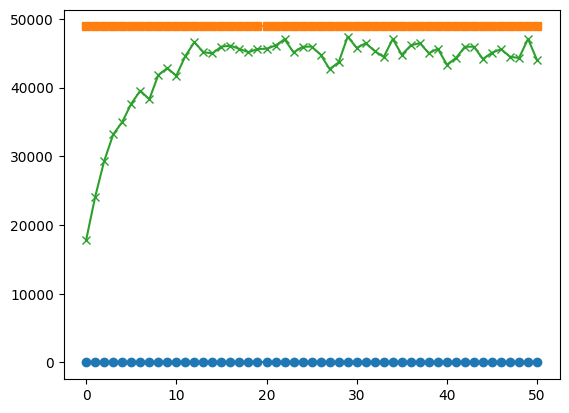

In [21]:
gen = logbook.select("gen")
min_fitness = logbook.select("min")
max_fitness = logbook.select("max")
avg_fitness = logbook.select("avg")

best_ind= tools.selBest(population, k=1)[0] #Mejor individuo de la población
plt.plot(gen, min_fitness, label="Mínimo",marker='o')
plt.plot(gen, max_fitness, label="Máximo",marker='s')
plt.plot(gen, avg_fitness, label="Promedio",marker='x') 

## Caso Máximizar Portafolio

Se va a buscar cual es la mejor combinación de portafolios entre P&G, General Electric, Google, Meta y Nvidia

In [22]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from deap import base, creator, tools, algorithms

In [23]:
tickers = ['PG','GE','GOOG','META','NVDA']
datos=pd.DataFrame()
for t in tickers:
    datos[t]=yf.download(t, start='2020-01-01')['Close']

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


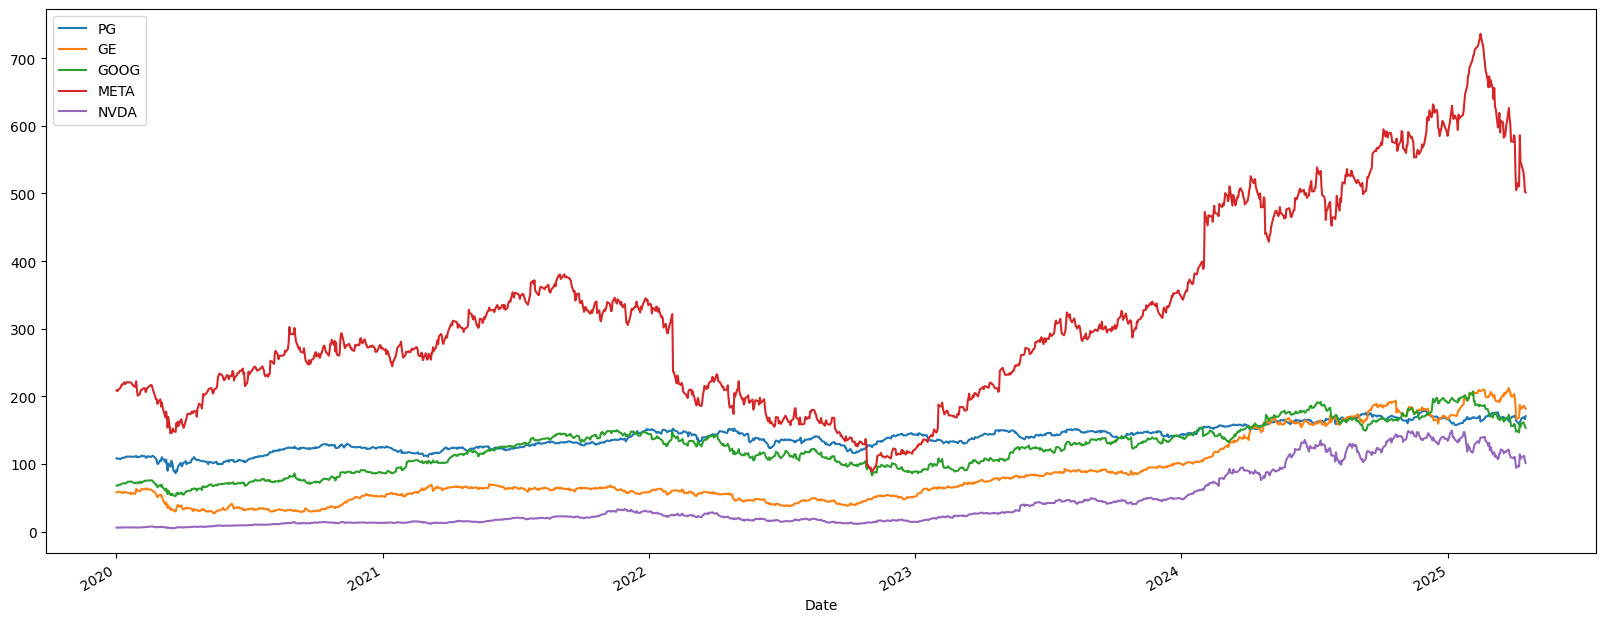

In [24]:
datos.plot(figsize=(20,8))
plt.show()
          

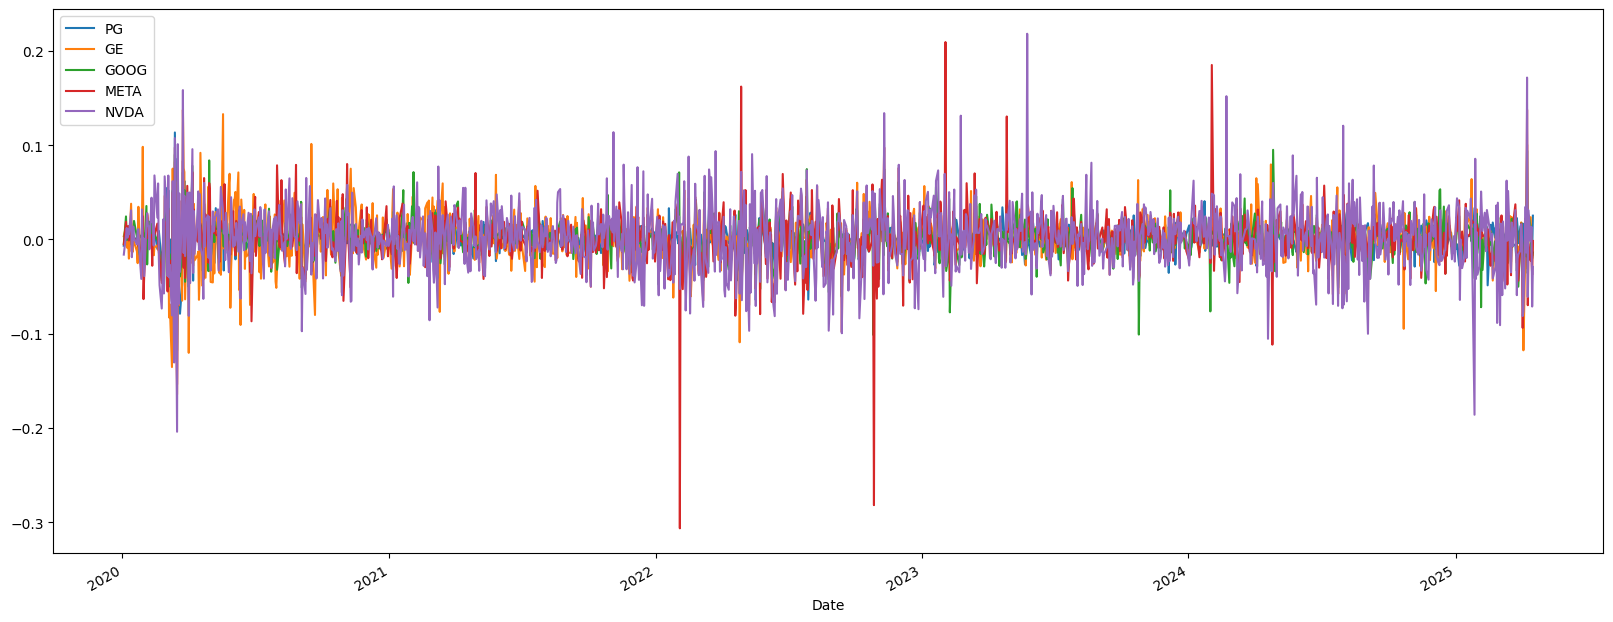

In [25]:
# Retorno logaritmico

retornoLog = np.log(datos/datos.shift(1))
retornoLog.plot(figsize=(20,8))
plt.show()

In [26]:
def evaluateportafolio(individuo,retorno):
    peso = np.array(individuo)/np.sum(individuo) #Como voy a dividir mi presupuesto entre las diferentes acciones
    retornoPortafolio = np.dot(peso, (retornoLog.mean()*252)) #Retorno esperado del portafolio
    volatilidadPortafolio = np.sqrt(np.dot(peso.T, np.dot(retornoLog.cov()*252, peso))) #Volatilidad del portafolio
    return retornoPortafolio,-volatilidadPortafolio, #El retorno tiene que ser una tupla

In [27]:
def crear_individuo():
    while True:
        ind = [random.randint(0,1) for _ in range(len(tickers))]
        if sum(ind) > 0:
            return creator.Individual(ind)

In [36]:
toolbox=base.Toolbox()
creator.create('FitnessMax', base.Fitness, weights=(1.0,-1.0,)) #Uno para maximizar, menos uno para minimizar
creator.create('Individual', list, fitness=creator.FitnessMax)
toolbox.register('attribute', random.randint, 0,1) #Crea individos de 0 o 1
toolbox.register('individual', crear_individuo)
toolbox.register('population', tools.initRepeat, list, toolbox.individual) #Crea la población
toolbox.register('select', tools.selTournament, tournsize=4) #Selecciona el torneo de 3
toolbox.register('mate', tools.cxOnePoint) #Cruza un individuos
toolbox.register('mutate', tools.mutUniformInt,low=0,up=1, indpb=0.1) #Mutación de un bit o cromosoma con probabilidad 0.1
toolbox.register('evaluate', evaluateportafolio, retorno=retornoLog) #Evalua la función de utilidad

stats= tools.Statistics(lambda ind: ind.fitness.values) #Estadísticas de la población
stats.register('max', np.max) #Máximo de la población
stats.register('min', np.min) #Mínimo de la población
stats.register('avg', np.mean) #Promedio de la población
stats.register('std', np.std) #Desviación estándar de la población

In [30]:
population = toolbox.population(n=100) #Población de 100 individuos
ngen, cxpd, mutpb = 50,0.5,0.1
population, logbook = algorithms.eaSimple(population, toolbox, cxpd, mutpb, ngen, stats, verbose=True) #Evolución de la población
# print('El resultado de la evolución es:')
# print(logbook)
# print('El mejor individuo es
gen = logbook.select("gen")
min_fitness = logbook.select("min")
max_fitness = logbook.select("max")
avg_fitness = logbook.select("avg")
best_ind= tools.selBest(population, k=1)[0] #Mejor individuo de la población

print(best_ind)

C:\Users\josal\AppData\Local\Temp\ipykernel_6692\3077943363.py:2: RuntimeWarning: invalid value encountered in divide
  peso = np.array(individuo)/np.sum(individuo) #Como voy a dividir mi presupuesto entre las diferentes acciones


gen	nevals	max     	min      	avg       	std     
0  	100   	0.536751	-0.549903	-0.0453782	0.293873
1  	55    	0.536751	-0.549903	-0.0294157	0.369946
2  	65    	nan     	nan      	nan       	nan     
3  	50    	nan     	nan      	nan       	nan     
4  	54    	0.536751	-0.549903	-0.00707974	0.540294
5  	61    	nan     	nan      	nan        	nan     
6  	60    	0.536751	-0.549903	-0.00696319	0.54207 
7  	50    	0.536751	-0.549903	-0.00671958	0.538682
8  	51    	0.536751	-0.549903	-0.00736352	0.537352
9  	48    	nan     	nan      	nan        	nan     
10 	55    	nan     	nan      	nan        	nan     
11 	50    	nan     	nan      	nan        	nan     
12 	53    	nan     	nan      	nan        	nan     
13 	65    	nan     	nan      	nan        	nan     
14 	49    	nan     	nan      	nan        	nan     
15 	52    	nan     	nan      	nan        	nan     
16 	58    	nan     	nan      	nan        	nan     
17 	51    	nan     	nan      	nan        	nan     
18 	49    	nan     	nan      	nan   

La mejor alternativa es invenrtir todo en NVIDIA

## Optimización Proyectos

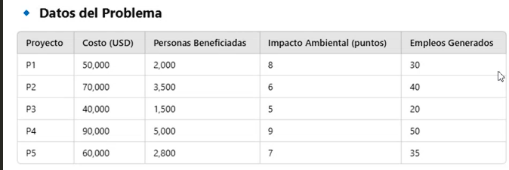

In [31]:
costo = np.array([50000, 70000, 40000, 90000, 60000])
personas_beneficiadas = np.array([2000, 3500, 1500, 5000, 2800])
impacto_ambiental = np.array([8,6,5,9,7])
empleos_generados = np.array([30,40,20,50,35])

In [32]:
def normalizador(array):
    return (array - np.min(array)) / (np.max(array) - np.min(array))

In [33]:
def fitness_funcion(individuo):
    personas_beneficiadas_normalizado = normalizador(personas_beneficiadas)
    impacto_ambiental_normalizado = normalizador(impacto_ambiental)
    empleos_generados_normalizado = normalizador(empleos_generados)

    costo_individuo = np.dot(individuo, costo)
    personas_beneficiadas_individuo = np.dot(individuo, personas_beneficiadas_normalizado)
    impacto_ambiental_individuo = np.dot(individuo, impacto_ambiental_normalizado)
    empleos_generados_individuo = np.dot(individuo, empleos_generados_normalizado)
    impacto_positivo = personas_beneficiadas_individuo+empleos_generados_individuo
    if costo_individuo > 150000:
        return -1,1000000,1000000,
    return impacto_positivo,impacto_ambiental_individuo,costo_individuo, #El retorno tiene que ser una tupla

In [34]:
#Crear el contenedor con toda la información
toolbox = base.Toolbox()
creator.create('FitnessMax', base.Fitness, weights=(1.0,-1.0,-1.0)) #Uno para maximizar, menos uno para minimizar
creator.create('Individual', list, fitness=creator.FitnessMax)

# Configuro como se va a realizar la población, el individuo y la función de evaluación
toolbox.register('attribute', random.randint, 0,1) #Crea individos de 0 o 1
toolbox.register('individual', tools.initRepeat, creator.Individual, toolbox.attribute, n=len(impacto_ambiental)) #n es el número de genes, este caso 5
toolbox.register('population', tools.initRepeat, list, toolbox.individual) #Crea la población
toolbox.register('select', tools.selTournament, tournsize=3) #Selecciona el torneo de 3
toolbox.register('mate', tools.cxOnePoint) #Cruza un individuos
toolbox.register('mutate', tools.mutFlipBit, indpb=0.05) #Mutación de un bit o cromosoma con probabilidad 0.05
toolbox.register('evaluate', fitness_funcion) #Evalua la función de utilidad

stats= tools.Statistics(lambda ind: ind.fitness.values) #Estadísticas de la población
stats.register('max', np.max) #Máximo de la población
stats.register('min', np.min) #Mínimo de la población
stats.register('avg', np.mean) #Promedio de la población
stats.register('std', np.std) #Desviación estándar de la población

gen	nevals	max  	min	avg   	std   
0  	100   	1e+06	-1 	368200	468432
1  	49    	1e+06	-1 	173067	345978
2  	51    	1e+06	-1 	100267	246222
3  	59    	1e+06	-1 	84734.3	210702
4  	62    	1e+06	-1 	111968 	257162
5  	63    	1e+06	-1 	53868  	103445
6  	53    	1e+06	-1 	55268.1	104154
7  	63    	1e+06	-1 	62334.8	129606
8  	56    	1e+06	-1 	56168.1	104579
9  	62    	1e+06	-1 	61968.1	129467
10 	55    	1e+06	-1 	74368  	168146
11 	50    	150000	1.5	50001.5	70709.6
12 	51    	1e+06 	-1 	80834.7	184185 
13 	66    	150000	1.5	50001.5	70709.6
14 	52    	1e+06 	-1 	68501.4	150275 
15 	55    	1e+06 	-1 	55968.1	104457 
16 	49    	1e+06 	-1 	56168.1	104579 
17 	76    	1e+06 	-1 	74468  	168146 
18 	53    	150000	1  	49601.4	70311.4
19 	62    	150000	0.5	49568.1	70323.1
20 	64    	1e+06 	-1 	55901.4	104403 
21 	54    	150000	0.5	49501.4	70275.2
22 	64    	1e+06 	-1 	55868.1	104439 
23 	52    	1e+06 	-1 	56168.1	104579 
24 	64    	1e+06 	-1 	61334.7	129365 
25 	64    	150000	1.5	50001.5	70709.6
26

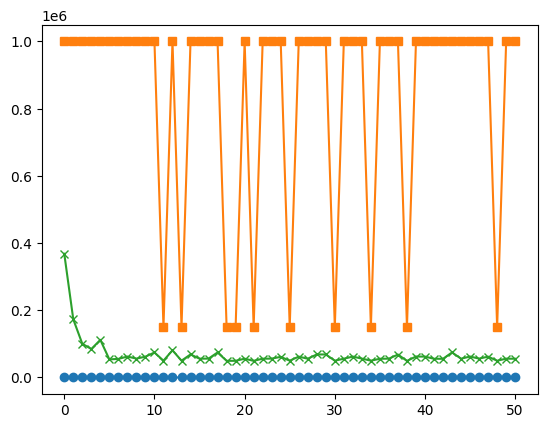

In [35]:
population = toolbox.population(n=100) #Población de 100 individuos
ngen, cxpd, mutpb = 50,0.5,0.1
population, logbook = algorithms.eaSimple(population, toolbox, cxpd, mutpb, ngen, stats, verbose=True) #Evolución de la población
# print('El resultado de la evolución es:')
# print(logbook)
# print('El mejor individuo es
gen = logbook.select("gen")
min_fitness = logbook.select("min")
max_fitness = logbook.select("max")
avg_fitness = logbook.select("avg")
best_ind= tools.selBest(population, k=1)[0] #Mejor individuo de la población

print(best_ind)


gen = logbook.select("gen")
min_fitness = logbook.select("min")
max_fitness = logbook.select("max")
avg_fitness = logbook.select("avg")

best_ind= tools.selBest(population, k=1)[0] #Mejor individuo de la población
plt.plot(gen, min_fitness, label="Mínimo",marker='o')
plt.plot(gen, max_fitness, label="Máximo",marker='s')
plt.plot(gen, avg_fitness, label="Promedio",marker='x') 